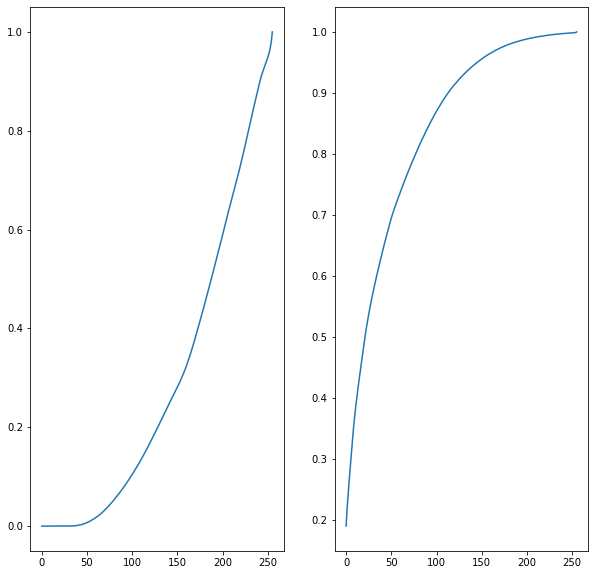

In [212]:
%matplotlib inline
from skimage.io import imread,imsave,imshow
from matplotlib import pyplot as plt
import numpy as np
from skimage.color import rgb2hsv, gray2rgb
from matplotlib import cm

target = imread("etretat.jpg")
test = imread("Diable.jpg")

def c_hist(im) :
    c_hist = np.zeros((256,))
    c=0
    for v in range(256):
        c += (im==v).sum()
        c_hist[v] = c
    c_hist /= c_hist.max()
    return c_hist

h =  c_hist(target)
h2 = c_hist(test)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(h)
plt.subplot(1,2,2)
plt.plot(h2)
plt.show()

def ALL(im, Tmin, Tmax) :
    LUT = np.arange(256)
    LUT[:Tmin]=0
    LUT[Tmax:]=255
    LUT[Tmin:Tmax] = (255/(Tmax-Tmin))*(LUT[Tmin:Tmax]-Tmin)
    im_out = im.copy()
    im_out = LUT[im]
    return im_out

def RED(im, Tmin, Tmax) :
    LUT = np.arange(256)
    LUT[:Tmin]=0
    LUT[Tmax:]=255
    LUT[Tmin:Tmax] = (255/(Tmax-Tmin))*(LUT[Tmin:Tmax]-Tmin)
    im_out = im.copy()
    im_out[:,:,0] = LUT[im[:,:,0]]
    return im_out

def BLUE(im, Tmin, Tmax) :
    LUT = np.arange(256)
    LUT[:Tmin]=0
    LUT[Tmax:]=255
    LUT[Tmin:Tmax] = (255/(Tmax-Tmin))*(LUT[Tmin:Tmax]-Tmin)
    im_out = im.copy()
    im_out[:,:,1] = LUT[im[:,:,1]]
    return im_out

def GREEN(im, Tmin, Tmax) :
    LUT = np.arange(256)
    LUT[:Tmin]=0
    LUT[Tmax:]=255
    LUT[Tmin:Tmax] = (255/(Tmax-Tmin))*(LUT[Tmin:Tmax]-Tmin)
    im_out = im.copy()
    im_out[:,:,2] = LUT[im[:,:,2]]
    return im_out

def CC(im, Am, AM, Rm, RM, Bm, BM, Gm, GM):
    im_all = ALL(im, Am,AM)
    im_red = RED(im_all,Rm,RM)
    im_blue = BLUE(im_red,Bm,BM)
    im_out = GREEN(im_blue,Gm,GM)
    return im_out

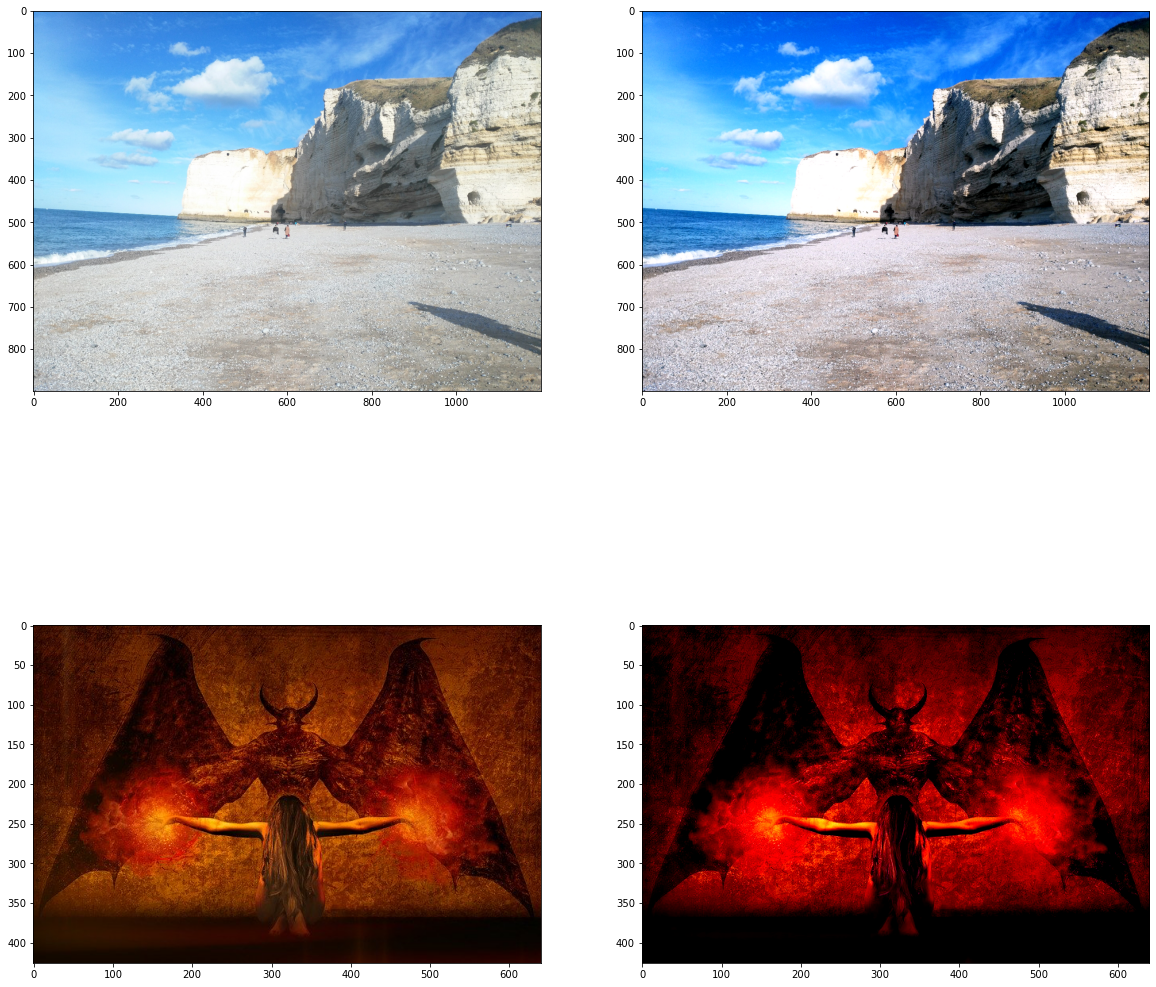

In [225]:

im_out = CC(target, 50,255, 20,230, 20,240, 20,230)
im2_out = CC(test, 25,220, 30,230, 70,255, 0,255)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.imshow(target)
plt.subplot(2,2,2)
plt.imshow(im_out)
plt.subplot(2,2,3)
plt.imshow(test)
plt.subplot(2,2,4)
plt.imshow(im2_out)
plt.show()